## DIA 002: Limpieza y normalizacion de datos con Pandas

En ciencia de datos, limpiar y normalizar los datos es un paso fundamental antes de construir modelos de predicción o realizar cualquier tipo de análisis.

- Limpieza de datos implica detectar y corregir errores, tratar con datos faltantes, eliminar duplicados, corregir tipos de variables, etc.

- Normalización o escalado de datos es importante cuando vas a aplicar ciertos algoritmos de Machine Learning (ej. redes neuronales, SVM, métodos basados en distancias), pues las variables con escalas muy distintas pueden afectar el rendimiento del modelo. Existen varias técnicas de normalización, como Min-Max Scaling, Standard Scaling, Robust Scaling, etc.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1.Cargar dataset
df = pd.read_csv("titanic.csv")

In [13]:
# 2.Exploracion Inicial
print("Primeras filas:")
print(df.head())
print("\nInformacion general:")
print(df.info())
print("\nValores nulos por columnas")
print(df.isnull().sum())

Primeras filas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [14]:
# 3.Manejo de valores nulos: ejemplo con 'Age'
# Si 'Age' tiene varios valores nulos, podemos imputarlos con la mediana
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25468\2803823292.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [ ]:
# 4.Eliminacion de filas donde 'Embarked' esta nulo
df.dropna(subset=['Embarked'], inplace=True)

In [17]:
# 5.Eliminacion de duplicados (si existieran)
duplicates = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicates}")
if(duplicates>0):
    df.drop_duplicates(inplace=True)

Filas duplicadas encontradas: 0


In [18]:
# 6.Conversion de tipos
# 'Pclass' esta bien como numerico, pero 'Sex' deberia ser categorico
df['Sex'] = df['Sex'].astype('category')

<function matplotlib.pyplot.show(close=None, block=None)>

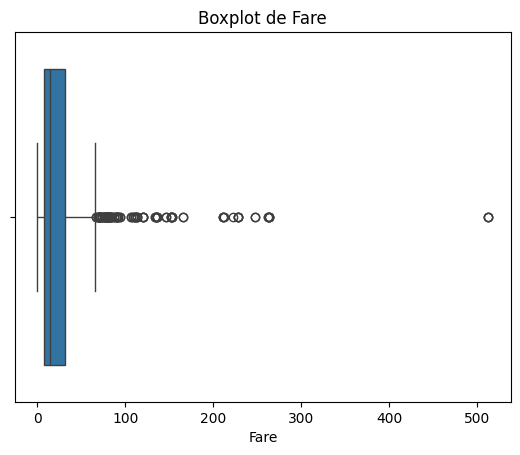

In [19]:
# 7.Observacion de outliners en 'Fare'
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Fare', data=df)
plt.title("Boxplot de Fare")
plt.show

In [20]:
# 8.Normalizacion de columnas numericas
# Seleccionamos 'Age' y 'Fare' para escalar
X = df[['Age','Fare']]

# Usamos StandarScaler como ejemplo
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

# Convertimos a Dataframe escalado 
x_scaler_df = pd.DataFrame(x_scaler, columns=['Age_scaled', 'Fare_scaled'])

# Unimos al Dataframe original (SIEMPRE HACER COPIA)}
df_scaled = df.copy()
df_scaled['Age_scaled'] = x_scaler_df['Age_scaled']
df_scaled['Fare_scaled'] = x_scaler_df['Fare_scaled']

print("\nEstadisticas de 'Age_scaled' y 'Fare_scaled':")
print(df_scaled[['Age_scaled','Fare_scaled']].describe())


Estadisticas de 'Age_scaled' y 'Fare_scaled':
         Age_scaled   Fare_scaled
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


In [21]:
# 9.Guardamos el numevo DF limpio y escalado
df_scaled.to_csv("titanic_clean_scaled.csv", index=False)